In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

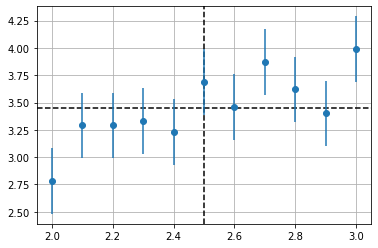

In [2]:
X = np.arange(2, 3.10, 0.10)
Y = np.array([2.78, 3.29, 3.29, 3.33, 3.23, 3.69, 3.46, 3.87, 3.62, 3.40, 3.99])
N = len(X)
Xm, Ym = np.mean(X), np.mean(Y)
plt.axhline(Ym, linestyle="dashed", color="k")
plt.axvline(Xm, linestyle="dashed", color="k")
plt.errorbar(X,Y, fmt='o', yerr=0.3)
plt.grid()

In [3]:
cov_mat = np.cov(X, Y)

VX, VY, VXY = cov_mat[0,0], cov_mat[1,1], cov_mat[0, 1]

SX, SY = np.sqrt(VX), np.sqrt(VY)

print(SX, SY)

corr = VXY/(SX * SY)

print(corr)
print(corr**2)

0.3316624790355403 0.3346640106136303
0.7919240297093961
0.6271436688311686


In [4]:
Xls = np.array([np.ones(len(X)), X]).T
A = np.linalg.inv(Xls.T @ Xls) @ Xls.T @ Y.T
print(A)

[1.45227273 0.79909091]


In [5]:
def lineal(x, a1, a2):
    x = np.array(x)
    return a1 + x*a2

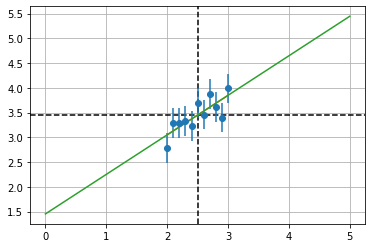

In [6]:
X = np.arange(2, 3.10, 0.10)
Y = np.array([2.78, 3.29, 3.29, 3.33, 3.23, 3.69, 3.46, 3.87, 3.62, 3.40, 3.99])
N = len(X)
Xm, Ym = np.mean(X), np.mean(Y)
plt.axhline(Ym, linestyle="dashed", color="k")
plt.axvline(Xm, linestyle="dashed", color="k")
plt.errorbar(X,Y, fmt='o', yerr=0.3)
plt.plot(Xls[:,1], Xls @ A)
plt.plot([0, 5], lineal([0,5], *A))
plt.grid()

Errores del ajuste dados por la matriz:
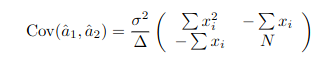
con


In [7]:
N = len(X)
delta = N * np.sum(X**2) - np.sum(X)**2
sigma = 0.3
erra1 = sigma**2/delta * np.sum(X**2)
erra2 = sigma**2/delta * N
a1, a2 = A
print(f"a1 = {a1} +- {np.sqrt(erra1)}")
print(f"a2 = {a2} +- {np.sqrt(erra2)}")

a1 = 1.4522727272727227 +- 0.7207950156219546
a2 = 0.7990909090909073 +- 0.28603877677367745


Calculo R^2 con estas formulas:
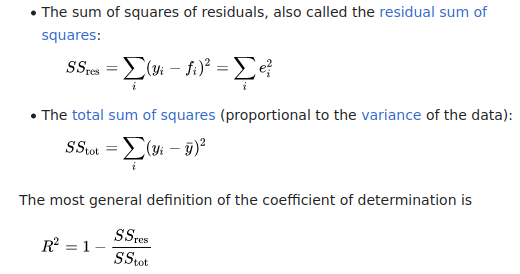

In [8]:
SSres = np.sum((Y - Xls @ A)**2)
SStot = np.sum((Y - np.mean(Y))**2)
R = 1 - SSres/SStot
print(SSres, SStot, R)

0.4175990909090913 1.1200000000000006 0.6271436688311687


In [23]:
xs = np.linspace(0, 5, 100)
reps = 100
ys = np.zeros(shape=(100, reps))
for row, x in enumerate(xs):
    for rep in range(reps):
        ys[row, rep] = np.random.normal(a2, np.sqrt(erra1))*x + np.random.normal(a2, np.sqrt(erra2))

print(xs, ys)

    

[0.         0.05050505 0.1010101  0.15151515 0.2020202  0.25252525
 0.3030303  0.35353535 0.4040404  0.45454545 0.50505051 0.55555556
 0.60606061 0.65656566 0.70707071 0.75757576 0.80808081 0.85858586
 0.90909091 0.95959596 1.01010101 1.06060606 1.11111111 1.16161616
 1.21212121 1.26262626 1.31313131 1.36363636 1.41414141 1.46464646
 1.51515152 1.56565657 1.61616162 1.66666667 1.71717172 1.76767677
 1.81818182 1.86868687 1.91919192 1.96969697 2.02020202 2.07070707
 2.12121212 2.17171717 2.22222222 2.27272727 2.32323232 2.37373737
 2.42424242 2.47474747 2.52525253 2.57575758 2.62626263 2.67676768
 2.72727273 2.77777778 2.82828283 2.87878788 2.92929293 2.97979798
 3.03030303 3.08080808 3.13131313 3.18181818 3.23232323 3.28282828
 3.33333333 3.38383838 3.43434343 3.48484848 3.53535354 3.58585859
 3.63636364 3.68686869 3.73737374 3.78787879 3.83838384 3.88888889
 3.93939394 3.98989899 4.04040404 4.09090909 4.14141414 4.19191919
 4.24242424 4.29292929 4.34343434 4.39393939 4.44444444 4.4949

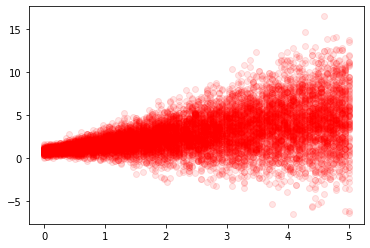

In [24]:
for i, x in enumerate(xs):
    plt.scatter(np.repeat(x, reps), ys[i, :], color='r', alpha=0.1)
plt.show()

In [28]:
def err_ya(xa, datos, sigma, delta ,signo=1, cuadrado=False):
    resultado = 0
    if cuadrado:
        for dato in datos:
            resultado += sigma**2/delta * (xa - dato)**2 
    else:
        for dato in datos:
            resultado += signo* np.sqrt(sigma**2/delta * (xa - dato)**2 )
    return resultado

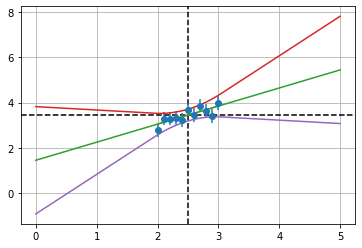

In [34]:
X = np.arange(2, 3.10, 0.10)
Y = np.array([2.78, 3.29, 3.29, 3.33, 3.23, 3.69, 3.46, 3.87, 3.62, 3.40, 3.99])
N = len(X)
Xm, Ym = np.mean(X), np.mean(Y)
plt.axhline(Ym, linestyle="dashed", color="k")
plt.axvline(Xm, linestyle="dashed", color="k")
plt.errorbar(X,Y, fmt='o', yerr=0.3)
plt.plot(Xls[:,1], Xls @ A)
plt.plot([0, 5], lineal([0,5], *A))
plt.grid()

xplot = np.linspace(0, 5, 100)
yplot = err_ya(xplot, X, sigma, delta)
plt.plot(xplot, lineal(xplot, *A) + yplot)
yplot = err_ya(xplot, X, sigma, delta, signo=-1)
plt.plot(xplot, lineal(xplot, *A) + yplot)
plt.show()